In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [7]:
digitos = load_digits()

In [8]:
print('Quantidade e forma das imagens', digitos.data.shape) # São 1797 imagens (imagens 8 por 8 imagens d-64)
print('Legenda dos dados', digitos.target.shape) # 1797 legendas (inteiros no intervalo 0–9)

Quantidade e forma das imagens (1797, 64)
Legenda dos dados (1797,)


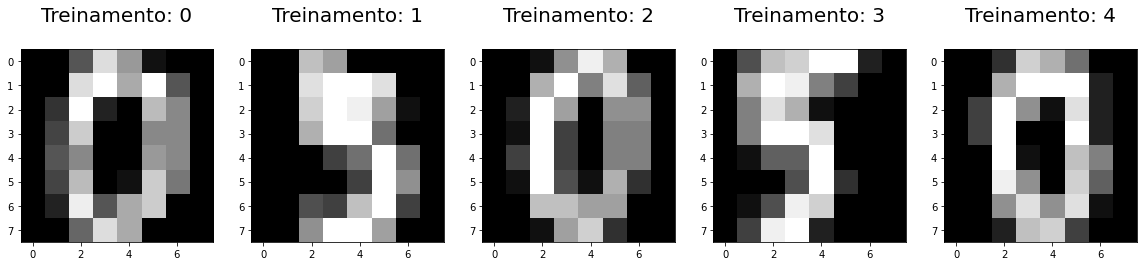

In [9]:
plt.figure(figsize=(20,4))
for indice, (imagem, legenda) in enumerate(zip(digitos.data[0::5], digitos.target[0:5])):
    plt.subplot(1, 5, indice+1)
    plt.imshow(np.reshape(imagem, (8,8)), cmap=plt.cm.gray)
    plt.title('Treinamento: %i\n' %legenda, fontsize = 20)

In [10]:
#separando em grupo de teste e grupo de treino
x_treino, x_teste, y_treino, y_teste = train_test_split(digitos.data, digitos.target, test_size=0.23, random_state=2)

In [11]:
print(x_treino.shape)

(1383, 64)


In [12]:
print(y_treino.shape)

(1383,)


In [13]:
print(x_teste.shape)

(414, 64)


In [14]:
print(y_teste.shape)

(414,)


In [15]:
from sklearn.linear_model import LogisticRegression
rLogis = LogisticRegression(max_iter = 100)
rLogis.fit(x_treino, y_treino)

C:\Users\jamuare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print(rLogis.predict(x_treino[1].reshape(1,-1)))

[6]


In [17]:
rLogis.predict(x_teste[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [18]:
previsao = rLogis.predict(x_teste)
score = rLogis.score(x_teste, y_teste)
print(score)

0.9516908212560387


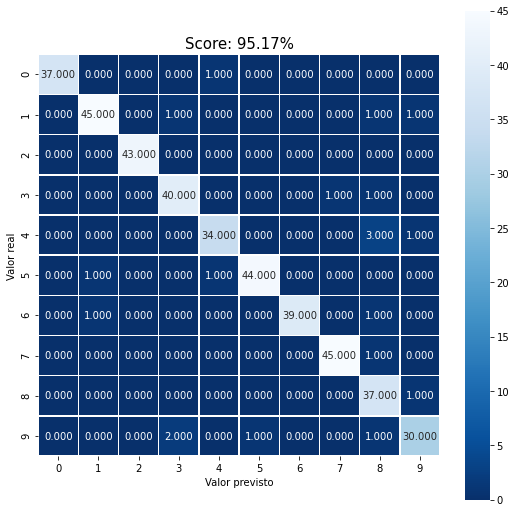

In [19]:
cm = metrics.confusion_matrix(y_teste, previsao)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Valor real');
plt.xlabel('Valor previsto');
titulo_geral = 'Score: {:.2%}'.format(score)
plt.title(titulo_geral, size = 15);

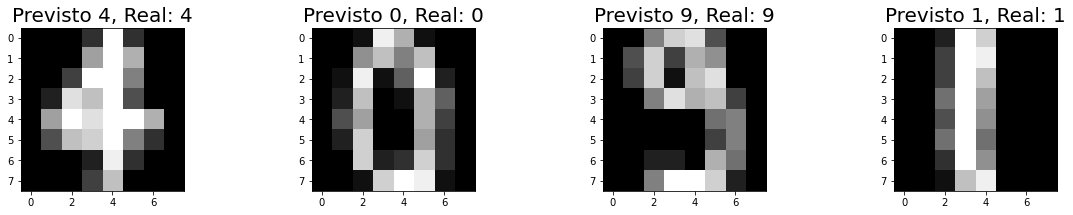

In [20]:
index = 0
classifiedIndex = []
for predict, actual in zip(previsao, y_teste):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_teste[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Previsto {}, Real: {}'.format(previsao[wrong], y_teste[wrong]), fontsize=20)